<font color = green >

###  Homework 17

</font>



In [23]:
import matplotlib.pyplot as plt

In [24]:
%matplotlib notebook

<IPython.core.display.Javascript object>


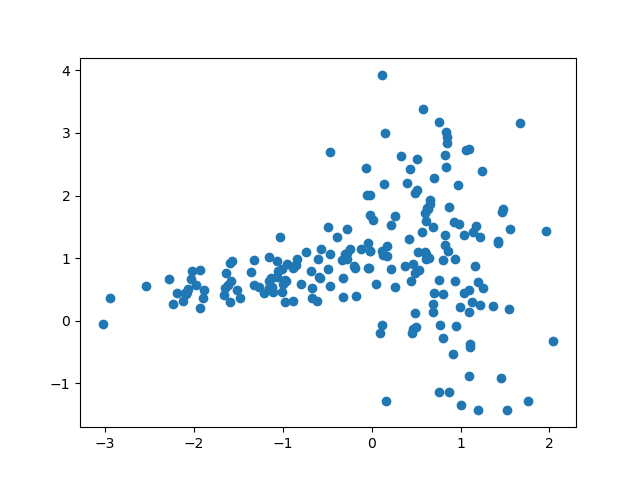

In [25]:
from sklearn.datasets import make_classification
Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)
plt.figure()
plt.scatter  (Xc_2[:,0], Xc_2[:,1])

<font color = green >

###  Steps of implementatiion

</font>

1) Initialize $K$ centroids 

2) Assign every point to closest centroid 

3) Compute new centroids as means of samples assigned to corresponding centroid

4) Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$

5) Iterate setps 2,3 till cost is stabile 

6) Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

7) Visualize results (clusters, centroids) for $K=4$

Note: 
* You may  need develop couple of additional/intermediate functions
* You may track cost changes to make sure the algorithm is working properly 

In [26]:
import numpy as np
import pandas as pd

In [39]:
X = Xc_2
m = X.shape[0] # number of training samples
n = X.shape[1] # number of features
n_iter = 20 # number of iteration
K = 4 # number of clusters

In [40]:
# step 1
# initialize K centroids
Centroids=np.array([]).reshape(n,0)

# we use random point for centoids
for i in range(K):
    rand=np.random.randint(0, m-1)
    Centroids=np.c_[Centroids,X[rand]]
print(Centroids)

[[-0.78887301 -0.60835836 -0.57996177  0.64441622]
 [ 0.58891079  0.98560361  0.67594842  0.99622238]]


In [41]:
# step 2
# assign every point to closest centroid 
Output={}

EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1

In [42]:
# step 3

Y={}

for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
    
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [43]:
# step 5
for i in range(n_iter):
    # step 2
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1
    # step 3
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
    for k in range(K):
        Y[k+1]=Y[k+1].T
    
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
    Output=Y

<IPython.core.display.Javascript object>


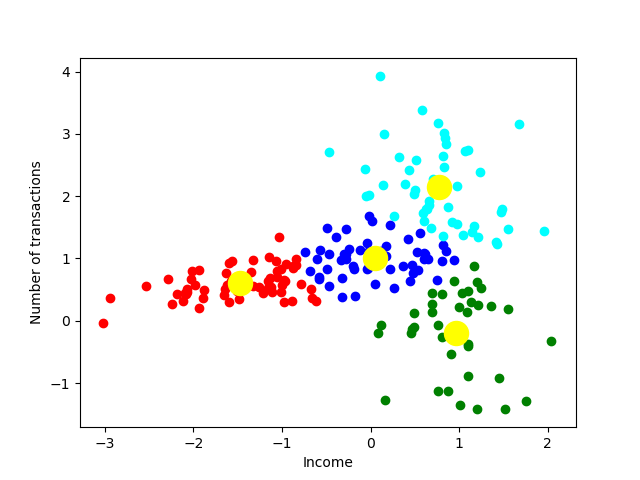

Text(0, 0.5, 'Number of transactions')

In [44]:
color=['red','blue','green','cyan']
labels=['cluster1','cluster2','cluster3','cluster4']
plt.figure()
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Income')
plt.ylabel('Number of transactions')

<font color = green >

## Learn more
</font>

[K-means clustering: how it works](https://www.youtube.com/watch?v=_aWzGGNrcic)

[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


[K-Means Clustering in Python with scikit-learn](https://www.datacamp.com/community/tutorials/k-means-clustering-python)